In [2]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.constraints import  maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import  np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [3]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## print sape
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


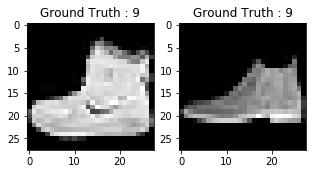

In [5]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [6]:
## Preprocessing
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [7]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = np_utils.to_categorical(train_Y)
test_Y_one_hot = np_utils.to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


In [8]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.25, random_state=13)


In [9]:
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [17]:
batch_size = 32
epochs = 25
num_classes = 10

In [18]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.2))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.3))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))  
fashion_model.add(Dropout(0.2))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [19]:
import keras
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [20]:
fashion_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 28, 1)         8096      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 28, 1)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 14, 1)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 14, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 14, 1)         18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 64, 14, 1)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 7, 1)          0         
__________

In [21]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 45s 994us/step - loss: 0.6740 - acc: 0.7490 - val_loss: 0.4475 - val_acc: 0.8375
Epoch 2/25
45000/45000 [==============================] - 52s 1ms/step - loss: 0.4700 - acc: 0.8270 - val_loss: 0.3864 - val_acc: 0.8563
Epoch 3/25
45000/45000 [==============================] - 52s 1ms/step - loss: 0.4197 - acc: 0.8440 - val_loss: 0.3666 - val_acc: 0.8619
Epoch 4/25
45000/45000 [==============================] - 61s 1ms/step - loss: 0.3960 - acc: 0.8527 - val_loss: 0.3436 - val_acc: 0.8703
Epoch 5/25
45000/45000 [==============================] - 63s 1ms/step - loss: 0.3744 - acc: 0.8626 - val_loss: 0.3296 - val_acc: 0.8779
Epoch 6/25
45000/45000 [==============================] - 60s 1ms/step - loss: 0.3658 - acc: 0.8659 - val_loss: 0.3174 - val_acc: 0.8833
Epoch 7/25
45000/45000 [==============================] - 65s 1ms/step - loss: 0.3514 - acc: 0.8710 - val_loss: 0.3128 - val_a

In [24]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.287132773054
Test accuracy: 0.894


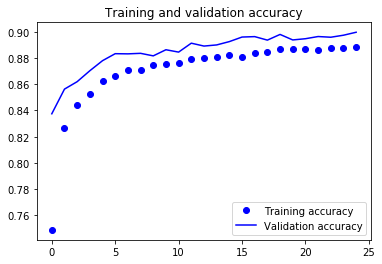

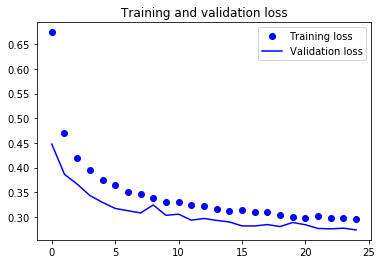

In [25]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.3))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.35))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))  
fashion_model.add(Dropout(0.45))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [28]:
import keras
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 28, 1)         8096      
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 32, 28, 1)         0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 14, 1)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 14, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 14, 1)         18496     
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 64, 14, 1)         0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 7, 1)          0         
__________

In [29]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=20,verbose=1,validation_data=(valid_X, valid_label))

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 46s 1ms/step - loss: 0.7437 - acc: 0.7230 - val_loss: 0.4761 - val_acc: 0.8191
Epoch 2/20
45000/45000 [==============================] - 47s 1ms/step - loss: 0.5178 - acc: 0.8086 - val_loss: 0.4231 - val_acc: 0.8427
Epoch 3/20
45000/45000 [==============================] - 47s 1ms/step - loss: 0.4626 - acc: 0.8322 - val_loss: 0.3777 - val_acc: 0.8621
Epoch 4/20
45000/45000 [==============================] - 47s 1ms/step - loss: 0.4385 - acc: 0.8420 - val_loss: 0.3552 - val_acc: 0.8707
Epoch 5/20
45000/45000 [==============================] - 45s 1ms/step - loss: 0.4155 - acc: 0.8490 - val_loss: 0.3530 - val_acc: 0.8717
Epoch 6/20
45000/45000 [==============================] - 48s 1ms/step - loss: 0.4044 - acc: 0.8517 - val_loss: 0.3420 - val_acc: 0.8747
Epoch 7/20
45000/45000 [==============================] - 47s 1ms/step - loss: 0.3950 - acc: 0.8555 - val_loss: 0.3261 - val_acc